# TechnoHacks Edu Tech
## DataScience Internship   
## Batch-7
### Task 2 :- Social Media Sentiment Analysics

### Social Media Sentiment Analysics Task By "Syed Sameer Ahamed"

Task :- (Social Media Sentiment Analysics)

Use a dataset of tweets or Facebook posts and
perform sentiment analysis to determine the
overall sentiment of the posts.

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle as pk
from sklearn.pipeline import Pipeline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [9]:
data = pd.read_csv('Tweets.csv', usecols=['airline_sentiment', 'text'])
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Data Exploration

In [10]:
#Shape Of Data
data.shape

(14640, 2)

In [11]:
#Info Of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [12]:
#NULL Data
data.isna().sum()

airline_sentiment    0
text                 0
dtype: int64

In [13]:
data.describe(include='object').transpose()

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
text,14640,14427,@united thanks,6


In [14]:
data[data.duplicated(keep=False)]

,airline_sentiment,text
14,positive,@VirginAmerica Thanks!
331,positive,@VirginAmerica Thanks!
504,positive,@united thanks
515,positive,@united thanks
867,positive,@united thank you.
...,...,...
13995,negative,@AmericanAir 800 number will not even let you...
14386,negative,@AmericanAir I want to speak to a human being!...
14392,negative,@AmericanAir no response to DM or email yet. ...
14543,negative,@AmericanAir should reconsider #usairways acqu...


In [15]:

data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

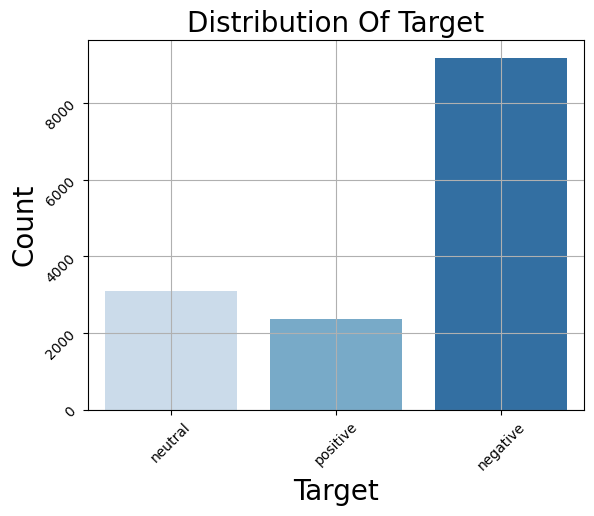

In [16]:
sns.countplot(x='airline_sentiment',data=data,palette='Blues')
plt.title('Distribution Of Target',fontsize=20)
plt.xlabel('Target',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

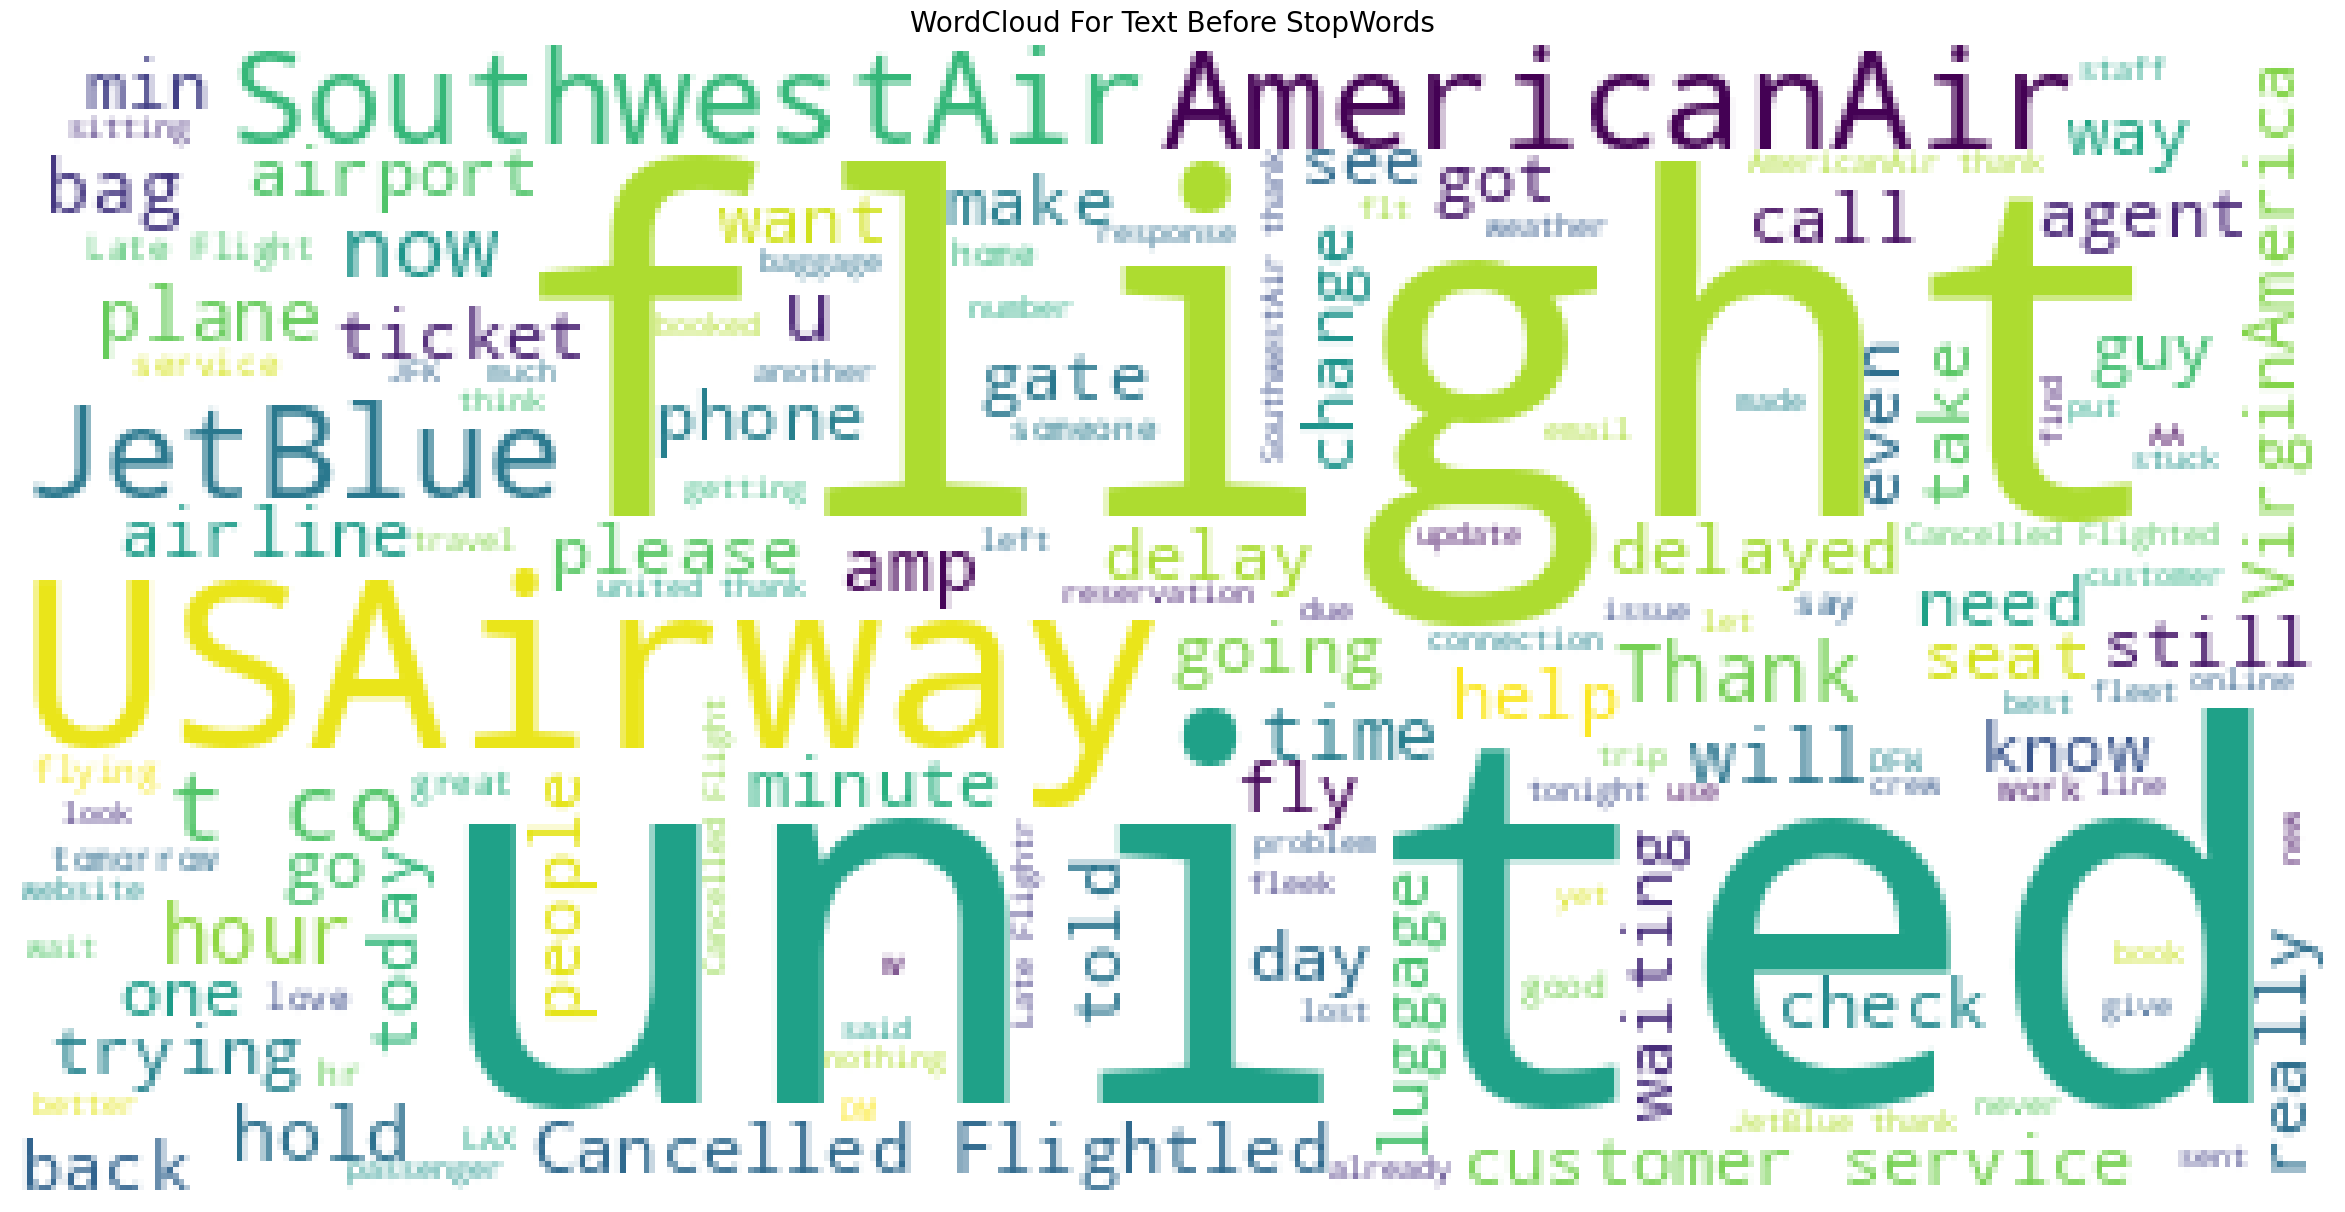

In [17]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white').generate(" ".join(data.text)))
plt.axis("off")
plt.title("WordCloud For Text Before StopWords",fontsize=20)
plt.show()

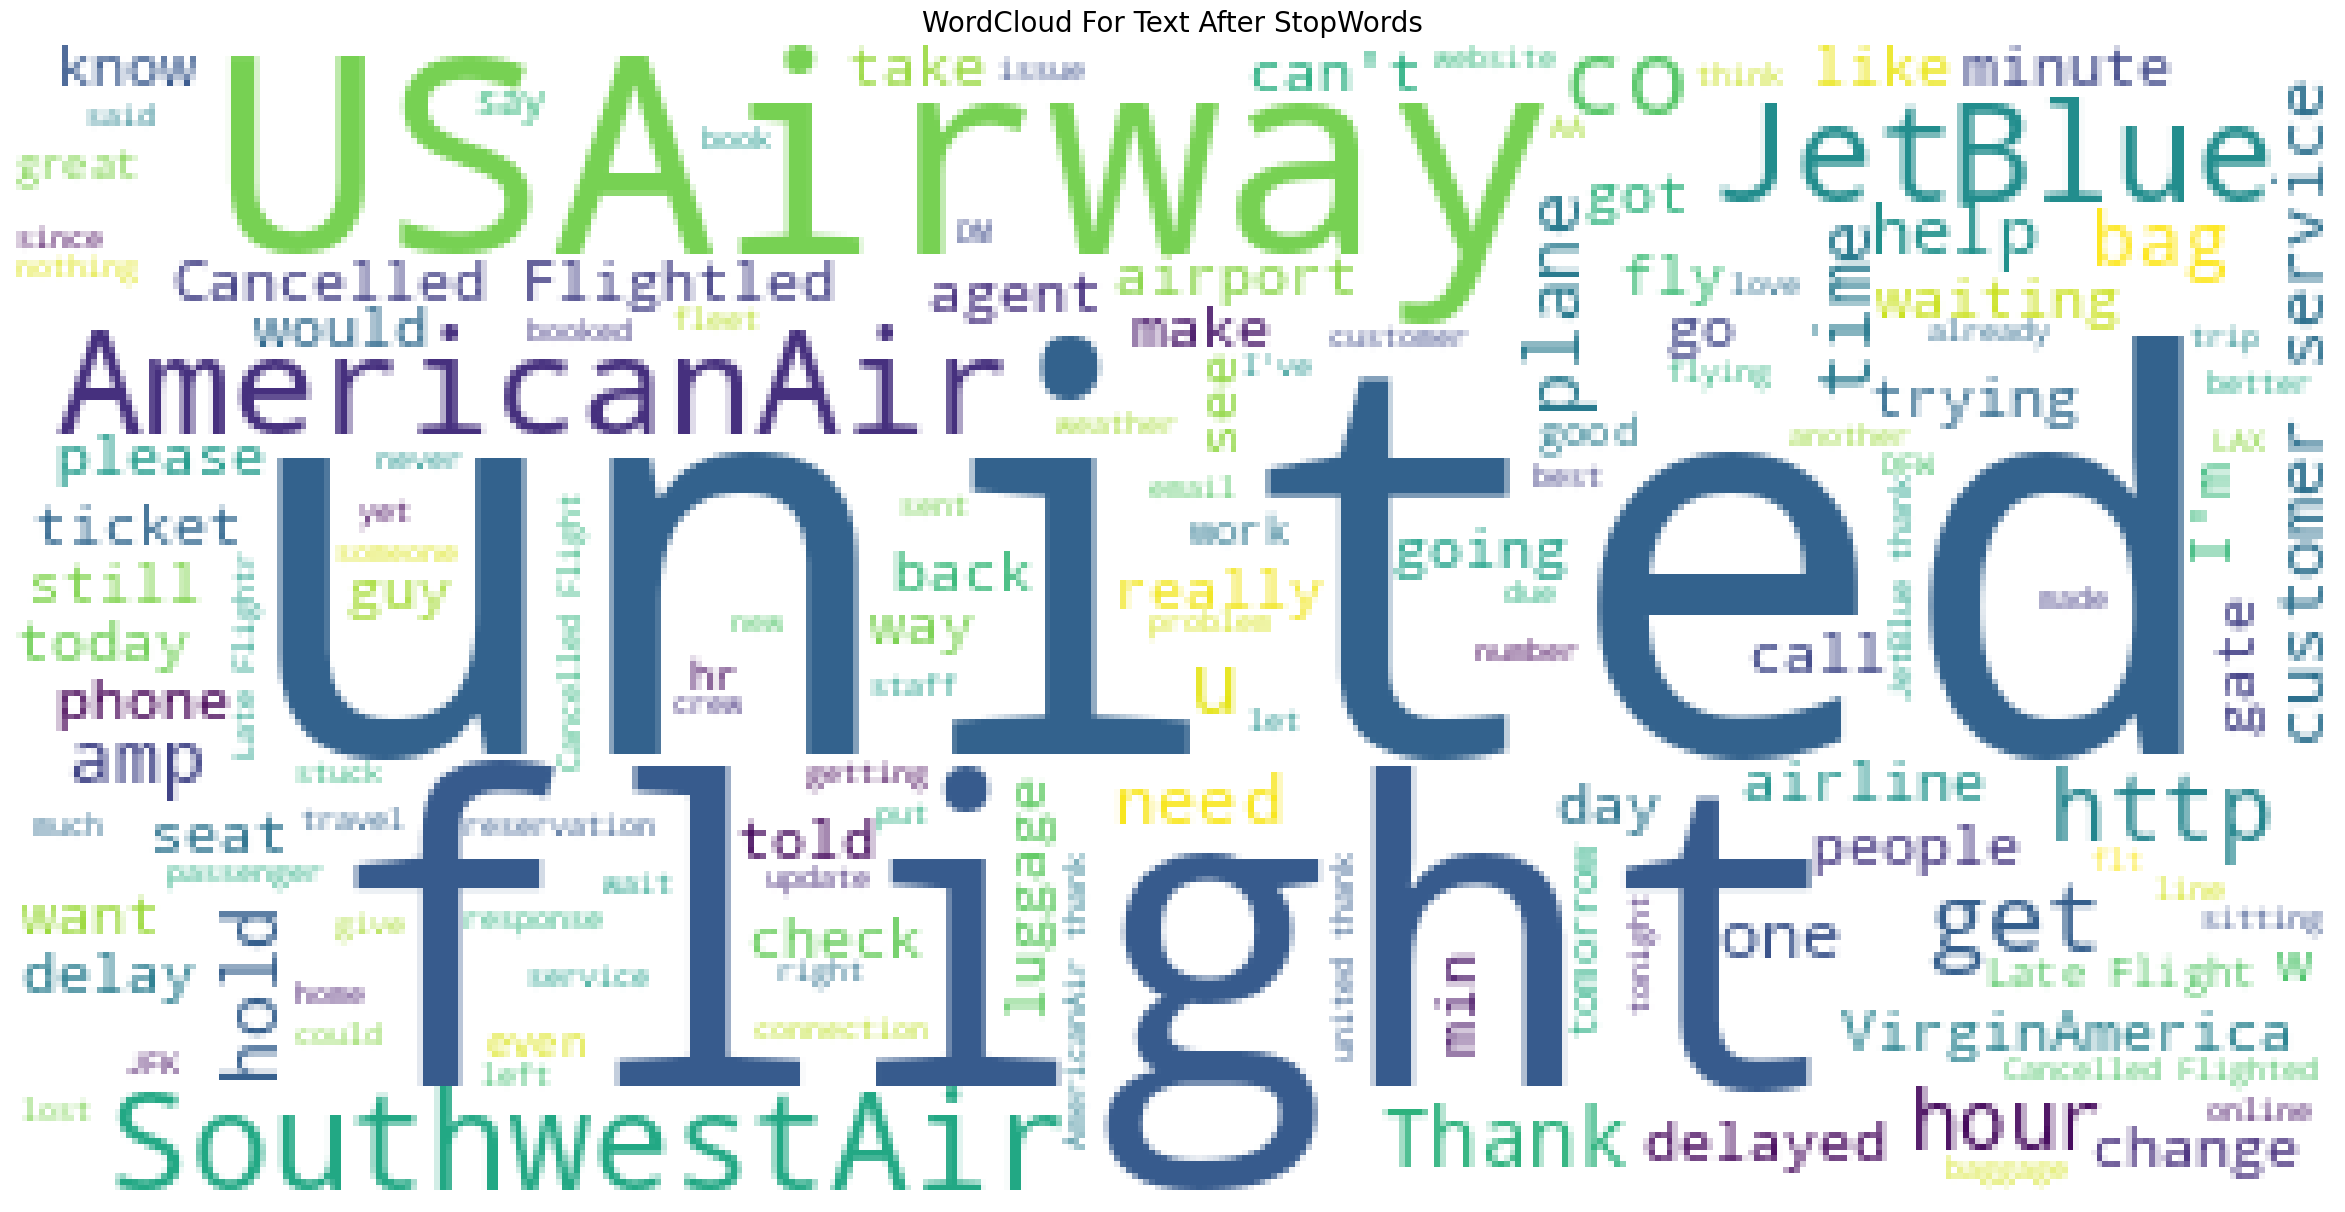

In [18]:
plt.figure(figsize=(30,20))
plt.imshow(WordCloud(background_color = 'white',stopwords=set(stopwords.words('english'))).generate(" ".join(data.text)))
plt.axis("off")
plt.title("WordCloud For Text After StopWords",fontsize=20)
plt.show()

#### Model Building

In [19]:
#Input
Text=data.text
Text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [42]:
def clean_text(text):
    # Remove Twitter handles starting with '@'
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [21]:
Target=data.airline_sentiment
Target

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [23]:
Target=data.airline_sentiment
Target

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [24]:
Target.replace('positive',1,inplace=True)
Target.replace('neutral',0,inplace=True)
Target.replace('negative',-1,inplace=True)
Target

0        0
1        1
2        0
3       -1
4       -1
        ..
14635    1
14636   -1
14637    0
14638   -1
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

In [25]:
vectorizer =TfidfVectorizer()
Text= vectorizer.fit_transform(Text)

In [26]:
for feature in np.random.randint(0,len(vectorizer.vocabulary_.keys()),100):
    print(list(vectorizer.vocabulary_.keys())[feature],end=' & ')

tropic & 10min & danihampton & fxnv618b1a & seek & forevercold & inadequate & 000114 & anyhelp & 901hlngbtx & iest & refreshes & ou & iitojhuikh & emerging & earlybirdmeansnothing & 1lesscustomer & galaxy & hungupnohelp & updateyourwebsite & luxury & cause & minimal & jm4geyxby5 & blocking & homegirl & bur & bros & makeup & hugely & ad & 433 & xtra & ay1gidcfa4 & nburnside26 & truebluemember4life & oilncfweyg & functional & repeatably & worstcustomerservice & code & theydontanswer & av_duffy & 6zj6l2ztua & dickheads & 5713 & celebrates & divided & mkwlkr & tnx & contd & uaywrr45as & mx & 748 & nooption & antonio & gotta & hindered & knock & wantmymoneyback & 8088 & adv & atrocious & cameragear & remained & refer & gusty & blackish & ua862 & fuel & 3001408092 & pack & laughed & miss & jedediahbila & ipaamzt7z2 & 25min & younger & ilm & 7700 & memorize & partial & gains & shafted & 2011 & sis & am9cuiewo4 & mmcwkqp2gy & 1299 & orange & any & recent & 1xdlbibclp & unbelievable & youve & c

In [27]:
smote=SMOTE()
Text,Target=smote.fit_resample(Text,Target)

In [28]:
#Split Data
X_train,X_test,y_train,y_test=train_test_split(Text,Target,test_size=.15,shuffle=True,random_state=44)
print('X_train Shape :',X_train.shape)
print('X_test Shape :',X_test.shape)
print('y_train Shape :',y_train.shape)
print('y_test Shape :',y_test.shape)

X_train Shape : (23403, 15051)
X_test Shape : (4131, 15051)
y_train Shape : (23403,)
y_test Shape : (4131,)


In [29]:
#Model
model=Pipeline([
    #('tfid',TfidfVectorizer()),
    ('model',RandomForestClassifier(criterion = 'gini',n_estimators=400,max_depth=600,random_state=44))
    ])
model.fit(X_train,y_train)

Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=600, n_estimators=400,
                                        random_state=44))])

#### Model Check

In [30]:

print('Pipeline Model Train Score is : ' , model.score(X_train, y_train))
print('Pipeline Model Test Score is : ' , model.score(X_test, y_test))

Pipeline Model Train Score is :  0.9986326539332564
Pipeline Model Test Score is :  0.9191479060760106


In [31]:
y_pred=model.predict(X_test)

In [32]:
df=pd.DataFrame()
df['Actual'],df['Predicted']=y_test,y_pred
df

,Actual,Predicted
18140,0,0
19943,0,0
22439,1,1
3479,1,1
16949,0,0
...,...,...
8375,-1,-1
22789,1,1
4877,0,0
15555,0,0


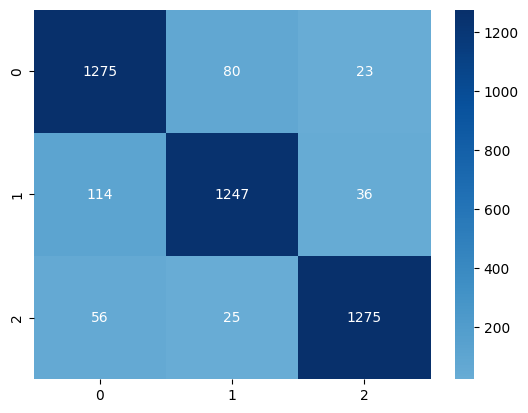

array([[1275,   80,   23],
       [ 114, 1247,   36],
       [  56,   25, 1275]])

In [33]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [34]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

          -1       0.88      0.93      0.90      1378
           0       0.92      0.89      0.91      1397
           1       0.96      0.94      0.95      1356

    accuracy                           0.92      4131
   macro avg       0.92      0.92      0.92      4131
weighted avg       0.92      0.92      0.92      4131

